In [1]:
import numpy as np
import sys, os,re
import matplotlib.pyplot as plt
path_to_eigen="/Users/rosamartinezcorral/Documents/eigenlibrary/eigen-eigen-323c052e1731/"
path_to_utilssynpy="../scriptssyn"
sys.path.append(path_to_utilssynpy)
import write_multiplebsites #in this case the usage of spanning trees becomes impractical. Therefore, in this code, standard routines to compute the matrix nullspace are used
import basic

In [2]:
import sys
sys.path.append("./bin")


In [3]:
def get_parvalues_array(pars,TFpars):
    par_values=np.zeros(len(pars))
    for p,par in enumerate(pars):
        if par[0]=="a":
            par_values[p]=TFpars["a"]
        elif par[0]=="b":
            par_values[p]=TFpars["b"]
        elif 'k_1_' in par:
            if par=="k_1_0":
                par_values[p]=TFpars["k_1_0"]
            else:
                par_values[p]=TFpars["k_1A"]
        elif 'k_2_' in par:
            if par=="k_2_0":
                par_values[p]=TFpars["k_2_0"]
            else:
                par_values[p]=TFpars["k_2A"]
        elif 'k_3_' in par:
            if par=="k_3_0":
                par_values[p]=TFpars["k_3_0"]
            else:
                par_values[p]=TFpars["k_3A"]
    return par_values

def get_parvalues_array_nsiteprop(pars,TFpars):
    par_values=np.zeros(len(pars))
    for p,par in enumerate(pars):
        if par[0]=="a":
            par_values[p]=TFpars["a"]
        elif par[0]=="b":
            par_values[p]=TFpars["b"]
        elif 'k_1_' in par:
            basal=TFpars["k_1_0"]
            factor=TFpars["k_1A"]
            if par=="k_1_0":
                par_values[p]=basal
            else:
                if factor is None:
                    par_values[p]=basal
                else:
                    k,one,subset=par.split("_")
                    nsitesbound=subset.count("U")+1
                    par_values[p]=basal*nsitesbound*factor #when there are n sites bound, the rate gets multiplied by the factor times the number of sites bound
        elif 'kr_1_' in par:
            basal=TFpars["kr_1_0"]
            factor=TFpars["kr_1A"]
            if par=="kr_1_0":
                par_values[p]=basal
            else:
                if factor is None:
                    par_values[p]=basal
                else:
                    k,one,subset=par.split("_")
                    nsitesbound=subset.count("U")+1
                    par_values[p]=basal*nsitesbound*factor
        
                    
        elif 'k_2_' in par:
            basal=TFpars["k_2_0"]
            factor=TFpars["k_2A"]
            if par=="k_2_0":
                par_values[p]=basal
            else:
                if factor is None:
                    par_values[p]=basal
                else:
                    k,one,subset=par.split("_")
                    nsitesbound=subset.count("U")+1
                    par_values[p]=basal*nsitesbound*factor
        elif 'k_3_' in par:
            basal=TFpars["k_3_0"]
            factor=TFpars["k_3A"]
            if par=="k_3_0":
                par_values[p]=basal
            else:
                if factor is None:
                    par_values[p]=basal
                else:
                    k,one,subset=par.split("_")
                    nsitesbound=subset.count("U")+1
                    par_values[p]=basal*nsitesbound*factor
    return par_values


def replace_x(alledges):
    for edge in alledges:
        lab=edge[1]
        #if "a1" or in lab:
        if "a" in lab:
            edge[1]=lab.replace("-x","-A")
    return 
    
def get_pars_fromalledges(alledges,TFnames=["A"]):
    pars=[]
    for enum,edge in enumerate(alledges):
        par=edge[1]
        for TF in TFnames:
            par=par.replace("-"+TF,"")
        pars.append(par)
    return pars
    
def get_node_indices_and_transitions(alledges):
    node_indices=[]
    transitions=[]
    for e,edge in enumerate(alledges):
        par=edge[1]
        if "k_3" in par:
            node_indices.append(edge[0]-1)
            transitions.append(e)
    return [node_indices,transitions]
    
def get_preL_forPython(alledges,pars,parvalues,nnodes,Aval):
    #nnodes=(2**bsites)*3
    pars_valuesd=dict()
    for pnum,par in enumerate(pars):
        pars_valuesd[par]=parvalues[pnum]

    L=np.zeros((nnodes,nnodes),dtype=object)
    #print(L)
    for edge in alledges:
        n0,par,n1=edge
        L[n1-1,n0-1]=par

    L_values=[]
    for row in L:
        #print(row)
        newr=[]
        for term in row:
            if term==0:
                #print(".")
                newr.append(0)
            elif "A" in term:
                term_=term.replace("-A","") 
                newr.append(pars_valuesd[term_]*Aval)
            else:
                newr.append(pars_valuesd[term])
        #print(newr)
        L_values.append(np.array(newr))


    L=np.vstack(L_values)
    return L

In [4]:
nnodes_cycle=3
parslist=[]
alledgeslist=[]
nilist=[]
trlist=[]

bsitelist=[1,2,3,4,5,6]
for bsites in bsitelist:
    bgraph_edges=write_multiplebsites.get_bindinggraph_edges(bsites)

    
    rev_cycle=[1] #first transition is reversible

    alledges=write_multiplebsites.merge_binding_withcycle(bgraph_edges,nnodes_cycle,rev_cycle=rev_cycle)
    replace_x(alledges)
    pars=get_pars_fromalledges(alledges)
    print("par names are", pars)
    ni,tr=get_node_indices_and_transitions(alledges)
    parslist.append(pars)
    alledgeslist.append(alledges)
    nilist.append(ni)
    trlist.append(tr)
    #if bsites<9:
    #    exec("import bPcycle_%dbs_%dstates_irrev_A as Ccode%s"%(bsites,nnodes_cycle,bsites))

par names are ['a1_0_1', 'k_1_0', 'kr_1_0', 'a1_0_2', 'k_2_0', 'a1_0_3', 'k_3_0', 'b1_1_1', 'k_1_1', 'kr_1_1', 'b1_1_2', 'k_2_1', 'b1_1_3', 'k_3_1']
par names are ['a1_0_1', 'k_1_0', 'kr_1_0', 'a1_0_2', 'k_2_0', 'a1_0_3', 'k_3_0', 'b1_1_1', 'k_1_1', 'kr_1_1', 'b1_1_2', 'k_2_1', 'b1_1_3', 'k_3_1', 'a2_0_1', 'a2_0_2', 'a2_0_3', 'b2_2_1', 'k_1_2', 'kr_1_2', 'b2_2_2', 'k_2_2', 'b2_2_3', 'k_3_2', 'a2_1_1', 'a2_1_2', 'a2_1_3', 'b2_1U2_1', 'k_1_1U2', 'kr_1_1U2', 'b2_1U2_2', 'k_2_1U2', 'b2_1U2_3', 'k_3_1U2', 'a1_2_1', 'a1_2_2', 'a1_2_3', 'b1_1U2_1', 'b1_1U2_2', 'b1_1U2_3']
par names are ['a1_0_1', 'k_1_0', 'kr_1_0', 'a1_0_2', 'k_2_0', 'a1_0_3', 'k_3_0', 'b1_1_1', 'k_1_1', 'kr_1_1', 'b1_1_2', 'k_2_1', 'b1_1_3', 'k_3_1', 'a2_0_1', 'a2_0_2', 'a2_0_3', 'b2_2_1', 'k_1_2', 'kr_1_2', 'b2_2_2', 'k_2_2', 'b2_2_3', 'k_3_2', 'a3_0_1', 'a3_0_2', 'a3_0_3', 'b3_3_1', 'k_1_3', 'kr_1_3', 'b3_3_2', 'k_2_3', 'b3_3_3', 'k_3_3', 'a2_1_1', 'a2_1_2', 'a2_1_3', 'b2_1U2_1', 'k_1_1U2', 'kr_1_1U2', 'b2_1U2_2', 'k_2_1U2

In [5]:
sys.path.append("./bin")
bsitelist=[1,2,3,4,5,6]
import final_4sites_highprec as Ccode4
import final_6sites_highprec as Ccode6


ss0= 0.011111111111111115
0.016217643218795624
0.02009495299826277
0.022971140850235897
0.02502804214237168
0.026413050225015316
0.02724735079439326

ss0= 0.011111111111111101
0.019994842890008087
0.02349314631803319
0.02369829985939288
0.02207811001383691
0.01961904131965021
0.01694202331171776

ss0= 0.011111111111111108
0.017509035921664015
0.011273127914450568
0.006646602200882166
0.004648977367817945
0.004147267926115547
0.0043226600026322875



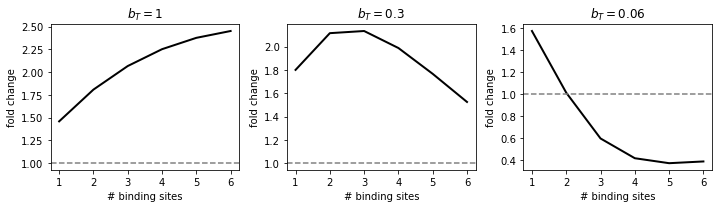

In [6]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for ku_,kuval in enumerate([1,0.3,0.06,]):
    TFpars={'a':0.1,'b':kuval,
            'kr_1_0':1,
            'k_1_0':0.1,
            'k_2_0':0.15,
            'k_3_0':0.15} #0.05
    TFpars['k_1A']=None
    TFpars['kr_1A']=None
    TFpars['k_2A']=TFpars["k_2_0"]*100
    TFpars['k_3A']=TFpars["k_3_0"]*0.05

    sslist=[]
    Aval=1


    #Ccodelist=[Ccode2,Ccode3,Ccode4,Ccode5,Ccode6,Ccode7,Ccode8]
    for b,bsites in enumerate(bsitelist):

        parvalues=get_parvalues_array_nsiteprop(parslist[b],TFpars)
        if b==0:
            L=get_preL_forPython(alledgeslist[b],parslist[b],parvalues,((2**bsites)*3),0) #basal, A=0
            rhospy=basic.compute_ss_fromL(L)
            tr=trlist[b]
            ni=nilist[b]
            ss0=np.sum(parvalues[tr]*rhospy[ni])
            print("ss0=", ss0)
        #if b==3:
        #    ss_C=Ccode4.interfacess(parvalues,np.array([Aval]),1e-15) #this is just to doublecheck, comment for speed
        #    print("\n----ss from C", ss_C,"(b is,", b, ")", end=",")
        #elif b==5:
        #    ss_C=Ccode6.interfacess(parvalues,np.array([Aval]),1e-15) #this is just to doublecheck, comment for speed
        #    print("\n----ss from C", ss_C, "(b is,", b, ")",  end=",")
        
            

        L=get_preL_forPython(alledgeslist[b],parslist[b],parvalues,((2**bsites)*3),Aval)
        rhospy=basic.compute_ss_fromL(L)
        tr=trlist[b]
        ni=nilist[b]
        ss=np.sum(parvalues[tr]*rhospy[ni])
        print(ss)
        sslist.append(ss/ss0)
    print()
    ax=axes[ku_]
    ax.set_title(r"$b_T=%g$"%kuval)    
    ax.plot(bsitelist,sslist,color="k",linewidth=2)
    ax.axhline(y=1,color="gray",linestyle="--")
    ax.set_xlabel("# binding sites")
    ax.set_ylabel("fold change")
plt.tight_layout()
plt.savefig("../../duality/figs/FigS7.pdf",bbox_inches="tight")
plt.show()

In [ ]:
Other psets

ss0= 0.0068965517241379275
0.007403402033778012
0.00787709537769708
0.008319232019560908

----ss from C 0.00873133262317935 (b is, 3 ),0.008731332623179258
0.009114842903532809

----ss from C 0.00947113795176482 (b is, 5 ),0.009471137951764777

ss0= 0.006896551724137924
0.008343064189498761
0.00896296124089068
0.009018810955081441

----ss from C 0.008705832695246413 (b is, 3 ),0.008705832695246473
0.008166467713804733

----ss from C 0.007502478911309095 (b is, 5 ),0.007502478911309005

ss0= 0.006896551724137926
0.0060650044572402115
0.004125520987363239
0.002531266755651683

----ss from C 0.0014809482511251154 (b is, 3 ),0.001480948251125122
0.0008549318463606505

----ss from C 0.0005036386550940377 (b is, 5 ),0.0005036386550940416



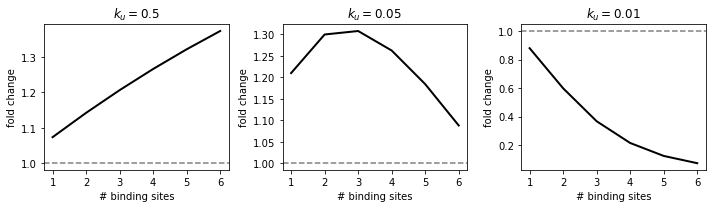

In [18]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for ku_,kuval in enumerate([0.5,0.05,0.01]):
    TFpars={'a':0.01,'b':kuval,
            'kr_1_0':1,
            'k_1_0':0.05,
            'k_2_0':0.2,
            'k_3_0':0.05}
    TFpars['k_1A']=None
    TFpars['kr_1A']=None
    TFpars['k_2A']=TFpars["k_2_0"]*100
    TFpars['k_3A']=TFpars["k_3_0"]*0.01

    sslist=[]
    Aval=1


    #Ccodelist=[Ccode2,Ccode3,Ccode4,Ccode5,Ccode6,Ccode7,Ccode8]
    for b,bsites in enumerate(bsitelist):

        parvalues=get_parvalues_array_nsiteprop(parslist[b],TFpars)
        if b==0:
            L=get_preL_forPython(alledgeslist[b],parslist[b],parvalues,((2**bsites)*3),0) #basal, A=0
            rhospy=basic.compute_ss_fromL(L)
            tr=trlist[b]
            ni=nilist[b]
            ss0=np.sum(parvalues[tr]*rhospy[ni])
            print("ss0=", ss0)
        if b==3:
            ss_C=Ccode4.interfacess(parvalues,np.array([Aval]),1e-15) #this is just to doublecheck, comment for speed
            print("\n----ss from C", ss_C,"(b is,", b, ")", end=",")
        elif b==5:
            ss_C=Ccode6.interfacess(parvalues,np.array([Aval]),1e-15) #this is just to doublecheck, comment for speed
            print("\n----ss from C", ss_C, "(b is,", b, ")",  end=",")
        
            

        L=get_preL_forPython(alledgeslist[b],parslist[b],parvalues,((2**bsites)*3),Aval)
        rhospy=basic.compute_ss_fromL(L)
        tr=trlist[b]
        ni=nilist[b]
        ss=np.sum(parvalues[tr]*rhospy[ni])
        print(ss)
        sslist.append(ss/ss0)
    print()
    ax=axes[ku_]
    ax.set_title(r"$b_T=%g$"%kuval)    
    ax.plot(bsitelist,sslist,color="k",linewidth=2)
    ax.axhline(y=1,color="gray",linestyle="--")
    ax.set_xlabel("# binding sites")
    ax.set_ylabel("fold change")
plt.tight_layout()
plt.savefig("../../duality/figs/FigSnoneqnsites.pdf",bbox_inches="tight")
plt.show()

ss0= 0.006896551724137934
0.008181161434934218
0.00910597371533417
0.009732405582993

----ss from C 0.010113554227912743 (b is, 3 ),0.010113554227912715
0.010295090385051853

----ss from C 0.010316089172759047 (b is, 5 ),0.01031608917275951

ss0= 0.006896551724137926
0.00835474569793276
0.008992264882468202
0.009071149706738765

----ss from C 0.008785905837573525 (b is, 3 ),0.008785905837573514
0.008278188940585508

----ss from C 0.007648983910754245 (b is, 5 ),0.007648983910754286

ss0= 0.006896551724137912
0.006145731283184565
0.004315985731943559
0.0028397588661906743

----ss from C 0.0019075114053921402 (b is, 3 ),0.0019075114053921413
0.0013971700197422591

----ss from C 0.0011589485512317084 (b is, 5 ),0.0011589485512317065



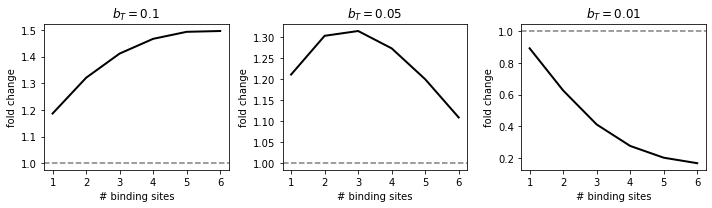

In [31]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for ku_,kuval in enumerate([0.1,0.05,0.01]):
    TFpars={'a':0.01,'b':kuval,
            'kr_1_0':1,
            'k_1_0':0.05,
            'k_2_0':0.2,
            'k_3_0':0.05}
    TFpars['k_1A']=None
    TFpars['kr_1A']=None
    TFpars['k_2A']=TFpars["k_2_0"]*100
    TFpars['k_3A']=TFpars["k_3_0"]*0.1

    sslist=[]
    Aval=1


    #Ccodelist=[Ccode2,Ccode3,Ccode4,Ccode5,Ccode6,Ccode7,Ccode8]
    for b,bsites in enumerate(bsitelist):

        parvalues=get_parvalues_array_nsiteprop(parslist[b],TFpars)
        if b==0:
            L=get_preL_forPython(alledgeslist[b],parslist[b],parvalues,((2**bsites)*3),0) #basal, A=0
            rhospy=basic.compute_ss_fromL(L)
            tr=trlist[b]
            ni=nilist[b]
            ss0=np.sum(parvalues[tr]*rhospy[ni])
            print("ss0=", ss0)
        if b==3:
            ss_C=Ccode4.interfacess(parvalues,np.array([Aval]),1e-15) #this is just to doublecheck, comment for speed
            print("\n----ss from C", ss_C,"(b is,", b, ")", end=",")
        elif b==5:
            ss_C=Ccode6.interfacess(parvalues,np.array([Aval]),1e-15) #this is just to doublecheck, comment for speed
            print("\n----ss from C", ss_C, "(b is,", b, ")",  end=",")
        
            

        L=get_preL_forPython(alledgeslist[b],parslist[b],parvalues,((2**bsites)*3),Aval)
        rhospy=basic.compute_ss_fromL(L)
        tr=trlist[b]
        ni=nilist[b]
        ss=np.sum(parvalues[tr]*rhospy[ni])
        print(ss)
        sslist.append(ss/ss0)
    print()
    ax=axes[ku_]
    ax.set_title(r"$b_T=%g$"%kuval)    
    ax.plot(bsitelist,sslist,color="k",linewidth=2)
    ax.axhline(y=1,color="gray",linestyle="--")
    ax.set_xlabel("# binding sites")
    ax.set_ylabel("fold change")
plt.tight_layout()
plt.savefig("../../duality/figs/FigSnoneqnsites.pdf",bbox_inches="tight")
plt.show()